# Churn Forecasting 

The HTML templates were modified for presentation based on this [Article](https://medium.com/star-gazers/building-churn-predictor-with-python-flask-html-and-css-fbab760e8441)

The templates were taken from this site: [Multi Boostrap Template](https://bootstrapmade.com/multi-responsive-bootstrap-template/)

Having control over the Churn rate is extremely important for companies that revolve around customers... It is necessary to take measures to avoid as much as possible that customers give up on the service offered by the company.


With that in mind, I developed a machine learning model to predict customer churn based on a Kaggle([Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)) database.


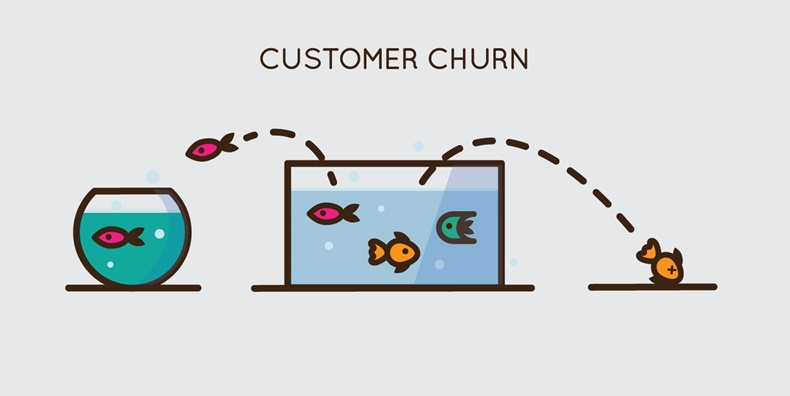

## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Opening the DF
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.dtypes

id                    int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [4]:
df_train.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df_train['Churn'].value_counts() # Checking the variables

0    4139
1    1495
Name: Churn, dtype: int64

In [6]:
df_train['Churn'].value_counts()[0] / len(df_train['Churn']) # Making a prediction based on luck

0.7346467873624423

In [7]:
df_train.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [8]:
df_train['TotalCharges'].dtype
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

In [9]:
df_train.dtypes

id                    int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [10]:
df_train.isna().sum()

id                    0
gender                0
SeniorCitizen         0
Partner               0
Dependents          218
tenure              461
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod        99
MonthlyCharges        0
TotalCharges          8
Churn                 0
dtype: int64

In [11]:
df_train = df_train.dropna()
df_train.isna().sum()

id                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
X = df_train.drop(['id', 'Churn'], axis=1)
y = df_train[['Churn']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
categorical_columns = X_train.select_dtypes(include="object").columns
numeric_columns = X_train.select_dtypes(exclude="object").columns

In [15]:
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [16]:
numeric_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## PipeLane

In [17]:

OHE = OneHotEncoder() # Encoder for the categorical variables
scaler = StandardScaler() # Encoder for the numeric variables
RFC = RandomForestClassifier(n_estimators=1000)


transformer = ColumnTransformer([('cat_cols', OHE, categorical_columns),
                                ('num_cols', scaler, numeric_columns)]) 

pipe = Pipeline([("preprocessing", transformer),
                ("classifier", RFC)])

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print(f'The accuracy of the model was:{accuracy_score(y_test, predictions)}')

The accuracy of the model was:0.8039376538146021


# Exporting the final model for deployment
import pickle

pickle.dump(pipe, open('./models/pipe.pkl', 'wb'))
